In [114]:
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
from sklearn.preprocessing import LabelEncoder
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import seaborn as sns
from keras.layers import Dense, BatchNormalization, Dropout, LSTM
from keras.models import Sequential
from tensorflow.keras.utils import to_categorical
#from keras.optimizers import Adam
from tensorflow.keras.optimizers import Adam
from tensorflow.keras import regularizers
from sklearn.metrics import precision_score, recall_score, confusion_matrix, classification_report, accuracy_score, f1_score
from keras import callbacks
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
np.random.seed(0)

In [115]:
data = pd.read_csv("D:\Year_3\Selected 1\Prject/weatherAUS.csv")
data.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No


In [116]:
data.shape

(145460, 23)

## evaluate the target find out if data is imbalanced or not

<AxesSubplot:xlabel='RainTomorrow', ylabel='count'>

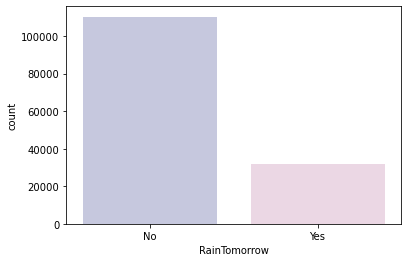

In [118]:

cols= ["#C2C4E2","#EED4E5"]
sns.countplot(x= data["RainTomorrow"], palette= cols)

## Handling missing valuse in categorical variables 

In [119]:
# Get list of categorical variables
s = (data.dtypes == "object")
object_cols = list(s[s].index) # <<-- List Atributes

print("Categorical variables:")
print(object_cols)

Categorical variables:
['Date', 'Location', 'WindGustDir', 'WindDir9am', 'WindDir3pm', 'RainToday', 'RainTomorrow']


In [120]:
# Missing values in categorical variables

for i in object_cols:
    print(i, data[i].isnull().sum())

Date 0
Location 0
WindGustDir 10326
WindDir9am 10566
WindDir3pm 4228
RainToday 3261
RainTomorrow 3267


In [121]:
# Filling missing values with mode of the column in value
for i in object_cols:
    data[i].fillna(data[i].mode()[0], inplace=True)

## Handling missing valuse in Numerical variables 

In [122]:
# Get list of neumeric variables
t = (data.dtypes == "float64")
num_cols = list(t[t].index)

print("Neumeric variables:")
print(num_cols)

Neumeric variables:
['MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine', 'WindGustSpeed', 'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm', 'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am', 'Temp3pm']


In [123]:
# Missing values in numeric variables
for i in num_cols:
    print(i, data[i].isnull().sum())

MinTemp 1485
MaxTemp 1261
Rainfall 3261
Evaporation 62790
Sunshine 69835
WindGustSpeed 10263
WindSpeed9am 1767
WindSpeed3pm 3062
Humidity9am 2654
Humidity3pm 4507
Pressure9am 15065
Pressure3pm 15028
Cloud9am 55888
Cloud3pm 59358
Temp9am 1767
Temp3pm 3609


In [124]:
# Filling missing values with median of the column in value

for i in num_cols:
    data[i].fillna(data[i].median(), inplace=True)
    
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145460 entries, 0 to 145459
Data columns (total 23 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Date           145460 non-null  object 
 1   Location       145460 non-null  object 
 2   MinTemp        145460 non-null  float64
 3   MaxTemp        145460 non-null  float64
 4   Rainfall       145460 non-null  float64
 5   Evaporation    145460 non-null  float64
 6   Sunshine       145460 non-null  float64
 7   WindGustDir    145460 non-null  object 
 8   WindGustSpeed  145460 non-null  float64
 9   WindDir9am     145460 non-null  object 
 10  WindDir3pm     145460 non-null  object 
 11  WindSpeed9am   145460 non-null  float64
 12  WindSpeed3pm   145460 non-null  float64
 13  Humidity9am    145460 non-null  float64
 14  Humidity3pm    145460 non-null  float64
 15  Pressure9am    145460 non-null  float64
 16  Pressure3pm    145460 non-null  float64
 17  Cloud9am       145460 non-nul

In [125]:
data.isna().any()

Date             False
Location         False
MinTemp          False
MaxTemp          False
Rainfall         False
Evaporation      False
Sunshine         False
WindGustDir      False
WindGustSpeed    False
WindDir9am       False
WindDir3pm       False
WindSpeed9am     False
WindSpeed3pm     False
Humidity9am      False
Humidity3pm      False
Pressure9am      False
Pressure3pm      False
Cloud9am         False
Cloud3pm         False
Temp9am          False
Temp3pm          False
RainToday        False
RainTomorrow     False
dtype: bool

## Apply label encoder to each column with categorical data

In [13]:
# Apply label encoder to each column with categorical data
label_encoder = LabelEncoder()
for i in object_cols:
    data[i] = label_encoder.fit_transform(data[i])
    
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145460 entries, 0 to 145459
Data columns (total 23 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Date           145460 non-null  int32  
 1   Location       145460 non-null  int32  
 2   MinTemp        145460 non-null  float64
 3   MaxTemp        145460 non-null  float64
 4   Rainfall       145460 non-null  float64
 5   Evaporation    145460 non-null  float64
 6   Sunshine       145460 non-null  float64
 7   WindGustDir    145460 non-null  int32  
 8   WindGustSpeed  145460 non-null  float64
 9   WindDir9am     145460 non-null  int32  
 10  WindDir3pm     145460 non-null  int32  
 11  WindSpeed9am   145460 non-null  float64
 12  WindSpeed3pm   145460 non-null  float64
 13  Humidity9am    145460 non-null  float64
 14  Humidity3pm    145460 non-null  float64
 15  Pressure9am    145460 non-null  float64
 16  Pressure3pm    145460 non-null  float64
 17  Cloud9am       145460 non-nul

In [14]:
data.dtypes

Date               int32
Location           int32
MinTemp          float64
MaxTemp          float64
Rainfall         float64
Evaporation      float64
Sunshine         float64
WindGustDir        int32
WindGustSpeed    float64
WindDir9am         int32
WindDir3pm         int32
WindSpeed9am     float64
WindSpeed3pm     float64
Humidity9am      float64
Humidity3pm      float64
Pressure9am      float64
Pressure3pm      float64
Cloud9am         float64
Cloud3pm         float64
Temp9am          float64
Temp3pm          float64
RainToday          int32
RainTomorrow       int32
dtype: object

## Correlation amongst numeric attributes

<AxesSubplot:>

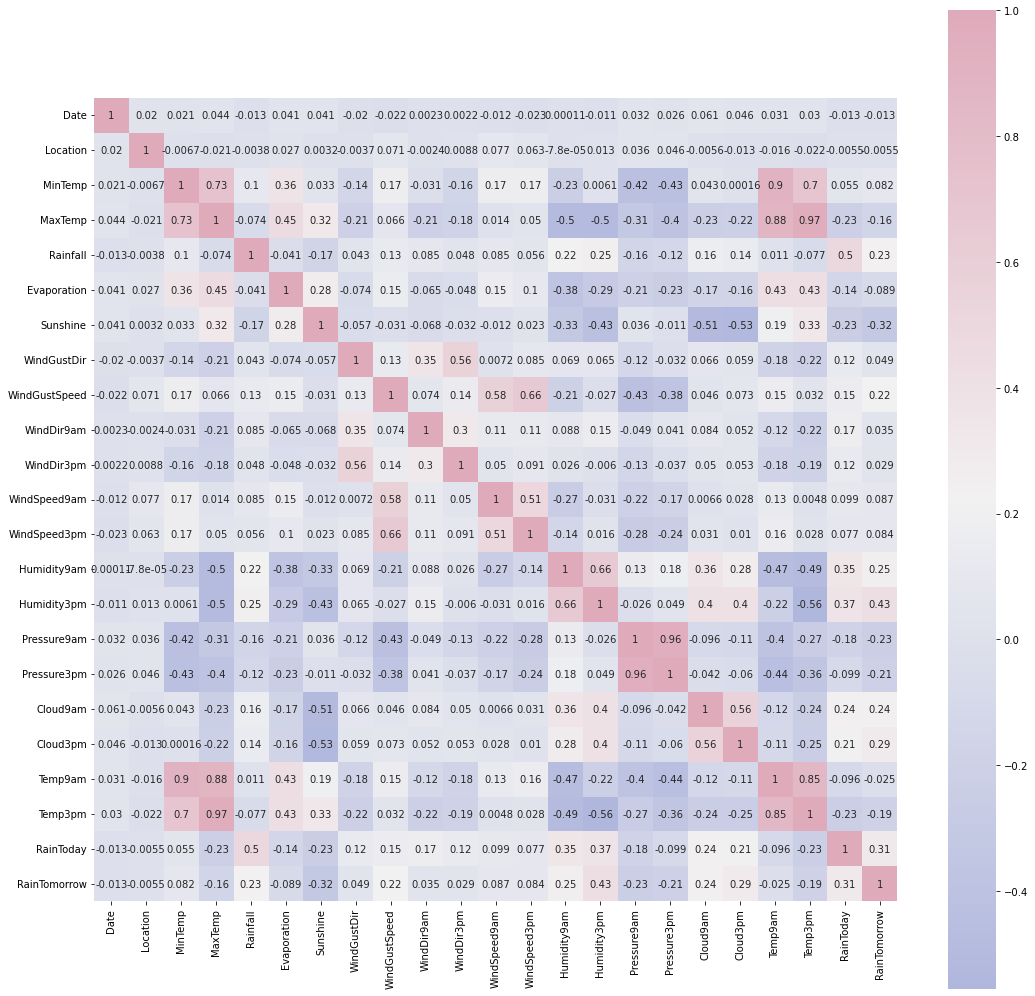

In [34]:
# Correlation amongst numeric attributes
corrmat = data.corr()
cmap = sns.diverging_palette(260,-10,s=50, l=75, n=6, as_cmap=True)
plt.subplots(figsize=(18,18))
sns.heatmap(corrmat,cmap= cmap,annot=True, square=True)

## Prepairing attributes of scale data


In [16]:

features = data.drop(['RainTomorrow'], axis=1) # dropping target and extra columns

target = data['RainTomorrow']

#Set up a standard scaler for the features
col_names = list(features.columns)
s_scaler = preprocessing.StandardScaler()
features = s_scaler.fit_transform(features)

features = pd.DataFrame(features, columns=col_names) #<<  Because arrays are valid indices in outlayer bart


features.describe().T

,count,mean,std,min,25%,50%,75%,max
Date,145460.0,-6.442896e-17,1.000003,-2.179105,-0.860439,0.025452,0.863884,1.702317
Location,145460.0,-5.633017e-14,1.000003,-1.672228,-0.899139,0.014511,0.857881,1.701250
MinTemp,145460.0,-4.243854e-15,1.000003,-3.250525,-0.705659,-0.030170,0.723865,3.410112
MaxTemp,145460.0,6.513740e-16,1.000003,-3.952405,-0.735852,-0.086898,0.703133,3.510563
Rainfall,145460.0,9.152711e-15,1.000003,-0.275097,-0.275097,-0.275097,-0.203581,43.945571
Evaporation,145460.0,1.352327e-14,1.000003,-1.629472,-0.371139,-0.119472,0.006361,43.985108
Sunshine,145460.0,-4.338304e-15,1.000003,-2.897217,0.076188,0.148710,0.257494,2.360634
WindGustDir,145460.0,1.864381e-14,1.000003,-1.724209,-0.872075,0.193094,1.045228,1.471296
WindGustSpeed,145460.0,-1.167921e-14,1.000003,-2.588407,-0.683048,-0.073333,0.460168,7.243246
WindDir9am,145460.0,-7.433272e-15,1.000003,-1.550000,-0.885669,0.000105,0.885879,1.771653


## Detecting outliers

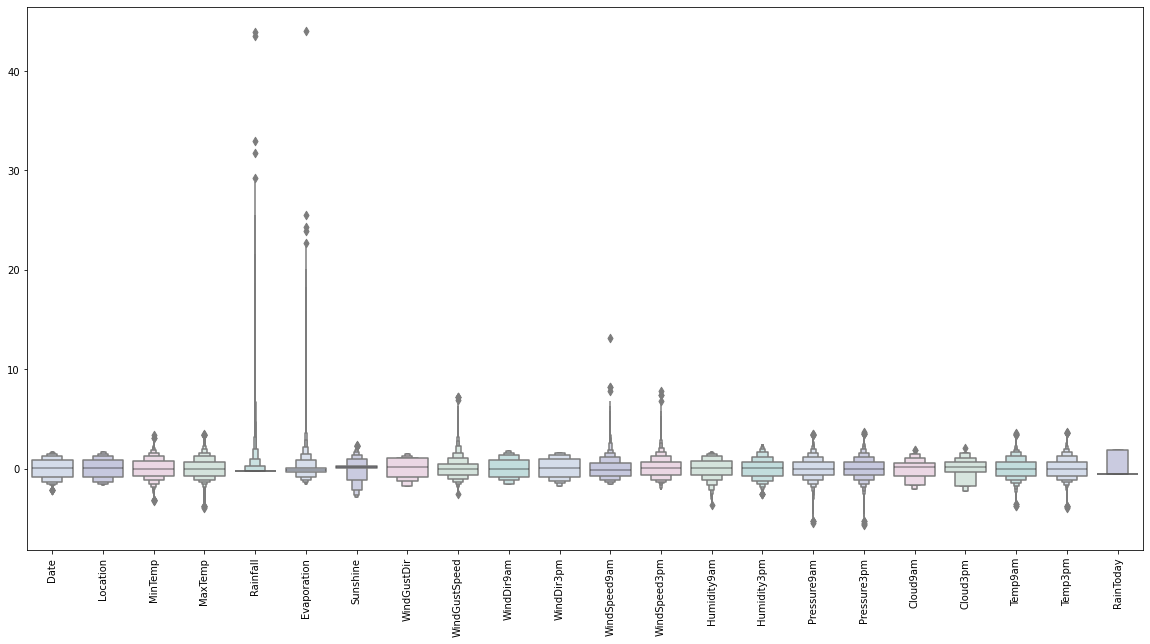

In [17]:
#Detecting outliers
#looking at the scaled features
colours = ["#D0DBEE", "#C2C4E2", "#EED4E5", "#D1E6DC", "#BDE2E2"]
plt.figure(figsize=(20,10))
sns.boxenplot(data = features,palette = colours)
plt.xticks(rotation=90)
plt.show()

# Dropping Outlier

In [19]:
#full data for 
features["RainTomorrow"] = target

#Dropping with outlier

features = features[(features["MinTemp"]<2.3)&(features["MinTemp"]>-2.3)]
features = features[(features["MaxTemp"]<2.3)&(features["MaxTemp"]>-2)]
features = features[(features["Rainfall"]<4.5)]
features = features[(features["Evaporation"]<2.8)]
features = features[(features["Sunshine"]<2.1)]
features = features[(features["WindGustSpeed"]<4)&(features["WindGustSpeed"]>-4)]
features = features[(features["WindSpeed9am"]<4)]
features = features[(features["WindSpeed3pm"]<2.5)]
features = features[(features["Humidity9am"]>-3)]
features = features[(features["Humidity3pm"]>-2.2)]
features = features[(features["Pressure9am"]< 2)&(features["Pressure9am"]>-2.7)]
features = features[(features["Pressure3pm"]< 2)&(features["Pressure3pm"]>-2.7)]
features = features[(features["Cloud9am"]<1.8)]
features = features[(features["Cloud3pm"]<2)]
features = features[(features["Temp9am"]<2.3)&(features["Temp9am"]>-2)]
features = features[(features["Temp3pm"]<2.3)&(features["Temp3pm"]>-2)]


features.shape

(127536, 23)

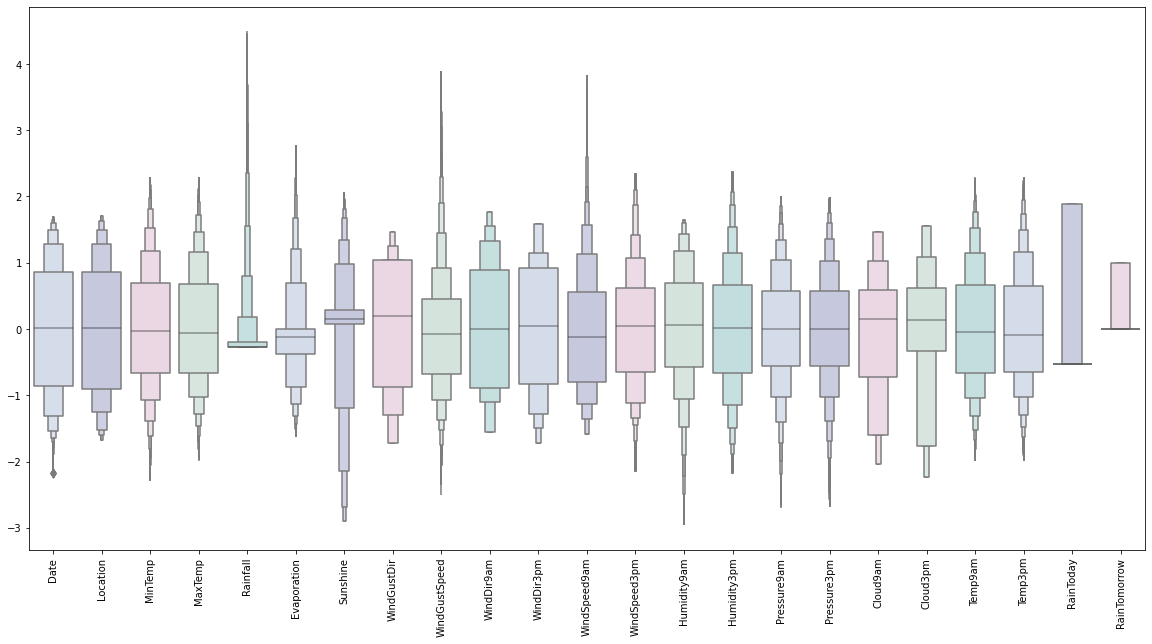

In [20]:
#looking at the scaled features without outliers

plt.figure(figsize=(20,10))
sns.boxenplot(data = features,palette = colours)
plt.xticks(rotation=90)
plt.show()

In [21]:
X = features.drop(["RainTomorrow"], axis=1)
y = features["RainTomorrow"]

# Splitting test and training sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

X.shape

(127536, 22)

In [111]:
from keras import regularizers
(127536, 26)
#Early stopping
early_stopping = callbacks.EarlyStopping(
    min_delta=0.001, # minimium amount of change to count as an improvement
    patience=20, # how many epochs to wait before stopping
    restore_best_weights=True,
)

# Initialising the NN
model = Sequential()

# layers

model.add(Dense(units = 32, kernel_initializer = 'uniform', activation = 'relu', input_dim = 22))
model.add(Dense(units = 32, kernel_initializer = 'uniform', activation = 'relu',kernel_regularizer=regularizers.l2(0.01)))
model.add(Dense(units = 16, kernel_initializer = 'uniform', activation = 'relu',kernel_regularizer=regularizers.l2(0.01)))
model.add(Dropout(0.25))
model.add(Dense(units = 8, kernel_initializer = 'uniform', activation = 'relu',kernel_regularizer=regularizers.l2(0.01)))
model.add(Dropout(0.5))
model.add(Dense(units = 1, kernel_initializer = 'uniform', activation = 'sigmoid',kernel_regularizer=regularizers.l2(0.01)))

# Compiling the ANN
opt = Adam(learning_rate=0.00009)
model.compile(optimizer = opt, loss = 'binary_crossentropy', metrics = ['accuracy'])



In [112]:
# Train the ANN
history = model.fit(X_train, y_train, batch_size = 32, epochs = 150, callbacks=[early_stopping], validation_split=0.2)

Epoch 1/150
2551/2551 [==============================] - 4s 1ms/step - loss: 0.5395 - accuracy: 0.7841 - val_loss: 0.4399 - val_accuracy: 0.7860
Epoch 2/150
2551/2551 [==============================] - 3s 1ms/step - loss: 0.4585 - accuracy: 0.7842 - val_loss: 0.4296 - val_accuracy: 0.7860
Epoch 3/150
2551/2551 [==============================] - 3s 1ms/step - loss: 0.4509 - accuracy: 0.7842 - val_loss: 0.4247 - val_accuracy: 0.7860
Epoch 4/150
2551/2551 [==============================] - 3s 1ms/step - loss: 0.4454 - accuracy: 0.7842 - val_loss: 0.4212 - val_accuracy: 0.7860
Epoch 5/150
2551/2551 [==============================] - 3s 1ms/step - loss: 0.4438 - accuracy: 0.7842 - val_loss: 0.4190 - val_accuracy: 0.7860
Epoch 6/150
2551/2551 [==============================] - 4s 1ms/step - loss: 0.4425 - accuracy: 0.7842 - val_loss: 0.4175 - val_accuracy: 0.7860
Epoch 7/150
2551/2551 [==============================] - 3s 1ms/step - loss: 0.4406 - accuracy: 0.7842 - val_loss: 0.4161 - val_ac

2551/2551 [==============================] - 3s 1ms/step - loss: 0.4276 - accuracy: 0.8402 - val_loss: 0.3997 - val_accuracy: 0.8430
Epoch 58/150
2551/2551 [==============================] - 3s 1ms/step - loss: 0.4261 - accuracy: 0.8399 - val_loss: 0.3998 - val_accuracy: 0.8449
Epoch 59/150
2551/2551 [==============================] - 3s 1ms/step - loss: 0.4269 - accuracy: 0.8399 - val_loss: 0.3997 - val_accuracy: 0.8439
Epoch 60/150
2551/2551 [==============================] - 3s 1ms/step - loss: 0.4248 - accuracy: 0.8396 - val_loss: 0.3996 - val_accuracy: 0.8444
Epoch 61/150
2551/2551 [==============================] - 3s 1ms/step - loss: 0.4262 - accuracy: 0.8403 - val_loss: 0.3993 - val_accuracy: 0.8443
Epoch 62/150
2551/2551 [==============================] - 3s 1ms/step - loss: 0.4259 - accuracy: 0.8400 - val_loss: 0.3995 - val_accuracy: 0.8433
Epoch 63/150
2551/2551 [==============================] - 4s 1ms/step - loss: 0.4260 - accuracy: 0.8400 - val_loss: 0.3989 - val_accuracy

2551/2551 [==============================] - 3s 1ms/step - loss: 0.4230 - accuracy: 0.8414 - val_loss: 0.3948 - val_accuracy: 0.8435
Epoch 114/150
2551/2551 [==============================] - 3s 1ms/step - loss: 0.4213 - accuracy: 0.8411 - val_loss: 0.3950 - val_accuracy: 0.8441
Epoch 115/150
2551/2551 [==============================] - 4s 1ms/step - loss: 0.4215 - accuracy: 0.8418 - val_loss: 0.3948 - val_accuracy: 0.8444
Epoch 116/150
2551/2551 [==============================] - 4s 1ms/step - loss: 0.4218 - accuracy: 0.8415 - val_loss: 0.3948 - val_accuracy: 0.8438
Epoch 117/150
2551/2551 [==============================] - 3s 1ms/step - loss: 0.4188 - accuracy: 0.8419 - val_loss: 0.3946 - val_accuracy: 0.8442
Epoch 118/150
2551/2551 [==============================] - 3s 1ms/step - loss: 0.4211 - accuracy: 0.8411 - val_loss: 0.3946 - val_accuracy: 0.8441
Epoch 119/150
2551/2551 [==============================] - 3s 1ms/step - loss: 0.4207 - accuracy: 0.8417 - val_loss: 0.3950 - val_ac

In [70]:
# Predicting the test set results
y_pred = model.predict(X_test)
y_pred = (y_pred > 0.5)

<AxesSubplot:>

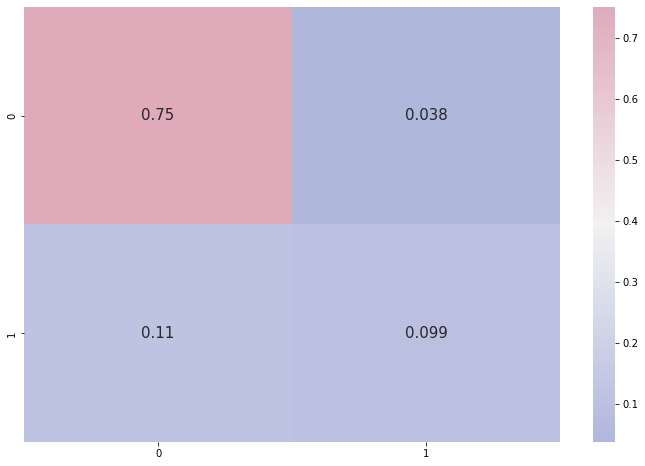

In [71]:
# confusion matrix
cmap1 = sns.diverging_palette(260,-10,s=50, l=75, n=5, as_cmap=True)
plt.subplots(figsize=(12,8))

cf_matrix = confusion_matrix(y_test, y_pred)

sns.heatmap(cf_matrix/np.sum(cf_matrix), cmap = cmap1, annot = True, annot_kws = {'size':15})

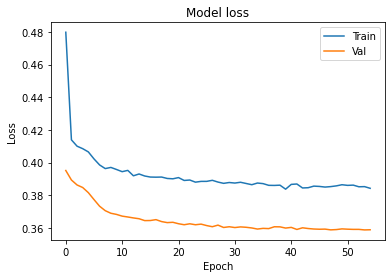

In [72]:
#visualize the training loss and the validation loss to see if the model is overfitting
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper right')
plt.show()

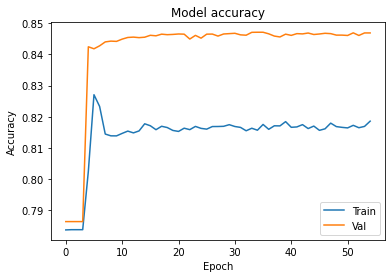

In [73]:
#visualize the training accuracy and the validation accuracy to see if the model is overfitting
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='lower right')
plt.show()

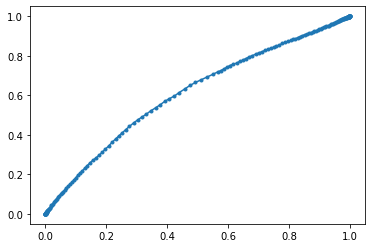

In [109]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt
y_pred = model.predict(X_test).ravel()
nn_fpr_keras, nn_tpr_keras, nn_thresholds_keras = roc_curve(y_test  , y_pred)
auc_keras = auc(nn_fpr_keras, nn_tpr_keras)
plt.plot(nn_fpr_keras, nn_tpr_keras, marker='.', label='Neural Network (auc = %0.3f)' % auc_keras)

In [74]:
# Predicting on train data
y_pred = model.predict(X_train)
score, acc = model.evaluate(X_train, y_train,batch_size=10)
print('Train score:', score)
print('Train accuracy:', acc*100)

10203/10203 [==============================] - 7s 641us/step - loss: 0.3566 - accuracy: 0.8494
Train score: 0.35658857226371765
Train accuracy: 84.94237065315247


In [75]:
model.evaluate(X_test, y_test)[1]

798/798 [==============================] - 1s 682us/step - loss: 0.3554 - accuracy: 0.8493


0.8493413925170898